In [64]:
import pandas as pd
import numpy as np
from pylab import *
from scipy.linalg import *
from scipy import signal

%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
# Скользящее среднее

def average_array(arr, N):
    len_arr = len(arr)
    di = 1 if N%2==0 else 0
    result = np.zeros(len_arr)
    for i in range(len_arr):
        min_i = i - int(N/2) # индекс начала окна
        max_i = i + int(N/2) # индекс конца окна
        result[i] = np.average(arr[max(min_i, 0): min(max_i-di, len_arr)])
    return result

In [66]:
# Дифференцирование массива данных

def diff(x,y):
    #if len(x)!=len(y):
     #   return throw
    N = len(x)
    result = np.zeros(N)
    i=0   
    while i<N-1:
        result[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
        i+=1
    else:
        result[i] = result[i-1]
    return result

In [67]:
#Метод наименьших квадратов

def create_mnq_model(X, M): #X - массив данных, M - степень полинома для аппроксимации
    len_arr = len(X)
    model = []
    for i in range(M+1):
        model.append(time**(M-i))
    s1 = vstack(model).T
    return s1

def polynom_value(A, x):
    y=0
    for i in range(len(A)):
        y *= x
        y += A[i]
    return y

def approx_mnq(x, y, m):
    model = create_mnq_model(x, m)
    s = lstsq(model, y)[0]
    result = polynom_value(s, x)
    return result, s

def polynom_diff(A):
    len_diff = len(A)-1
    diff = np.zeros(len_diff)
    for i in range(len_diff):
        diff[i] = (len_diff - i) * A[i]
    return diff


(1312, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 2 columns):
0    1312 non-null float64
1    1312 non-null float64
dtypes: float64(2)
memory usage: 20.6 KB
None
           0         1
0  27.350223  0.649351
1  27.350779  0.665584
2  27.351334  0.681818
3  27.351890  0.681818
4  27.352446  0.698052
1312 1312
1275 1275


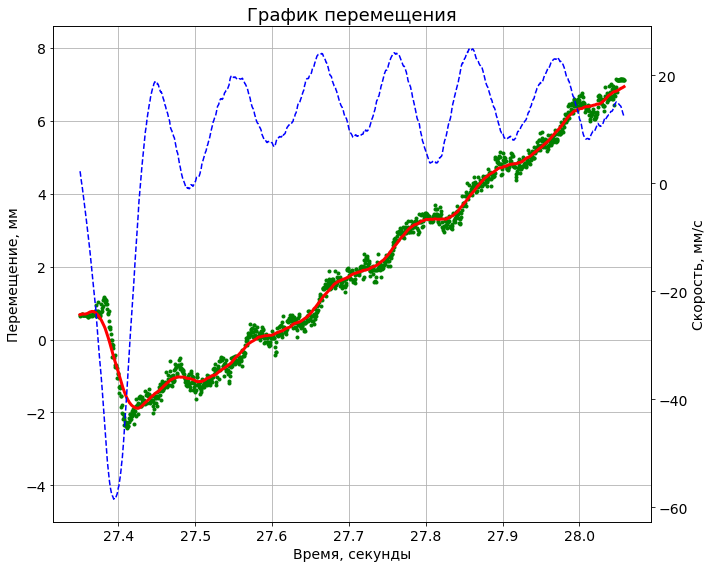

In [91]:
file_name = 'data2.xlsx'
#xl = pd.ExcelFile(file_name)  #Загрузка таблицы
#print(xl.sheet_names)    #Печать названий листов
#df1 = xl.parse('WinPos') #Загрузка листа во фрейм данных df1
#print(df1)

with open(file_name, 'r') as f:
    data_table = pd.read_excel(file_name, index_col=None, header = None)
    #df1 = xl.parse('WinPos')

print(data_table.shape)
print(data_table.info())
print(data_table.iloc[:5,:5])

time = np.array(data_table[0])
data = np.array(data_table[1])
print(len(time), len(data))

for i in range(len(data)):
    if data[i] <= -5:
        data = data[:-len(data)+i]
        time = time[:-len(time)+i]
        break
print(len(time), len(data))

average_data = average_array(data, 75)

data_diff = diff(time, average_data)
average_diff = average_array(data_diff, 75)


#plt.style.use('seaborn')
#plt.style.use('style/elegant.mplstyle')

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim(ymin=-5, ymax=max(data)*1.2)
ax.plot(time, data, 'g.')
ax.plot(time, average_data, 'r', linewidth = 3)
ax.set_xlabel('Время, секунды', fontsize = 14)
ax.set_ylabel('Перемещение, мм', fontsize = 14)
ax.set_title("График перемещения", fontsize = 18)
ax.tick_params(axis="both", labelsize = 14)
ax.grid(axis = 'both')

ax2 = ax.twinx()
ax2.plot(time, average_diff, 'b--')
ax2.set_ylabel('Скорость, мм/с', fontsize = 14)
ax2.tick_params(labelsize = 14)
fig.tight_layout()

#plt.savefig('fig')
plt.show()

In [69]:
#Аппроксимация методом наименьших квадратов

aprox_data, s = approx_mnq(time, data, 10)
s_diff = polynom_diff(s)

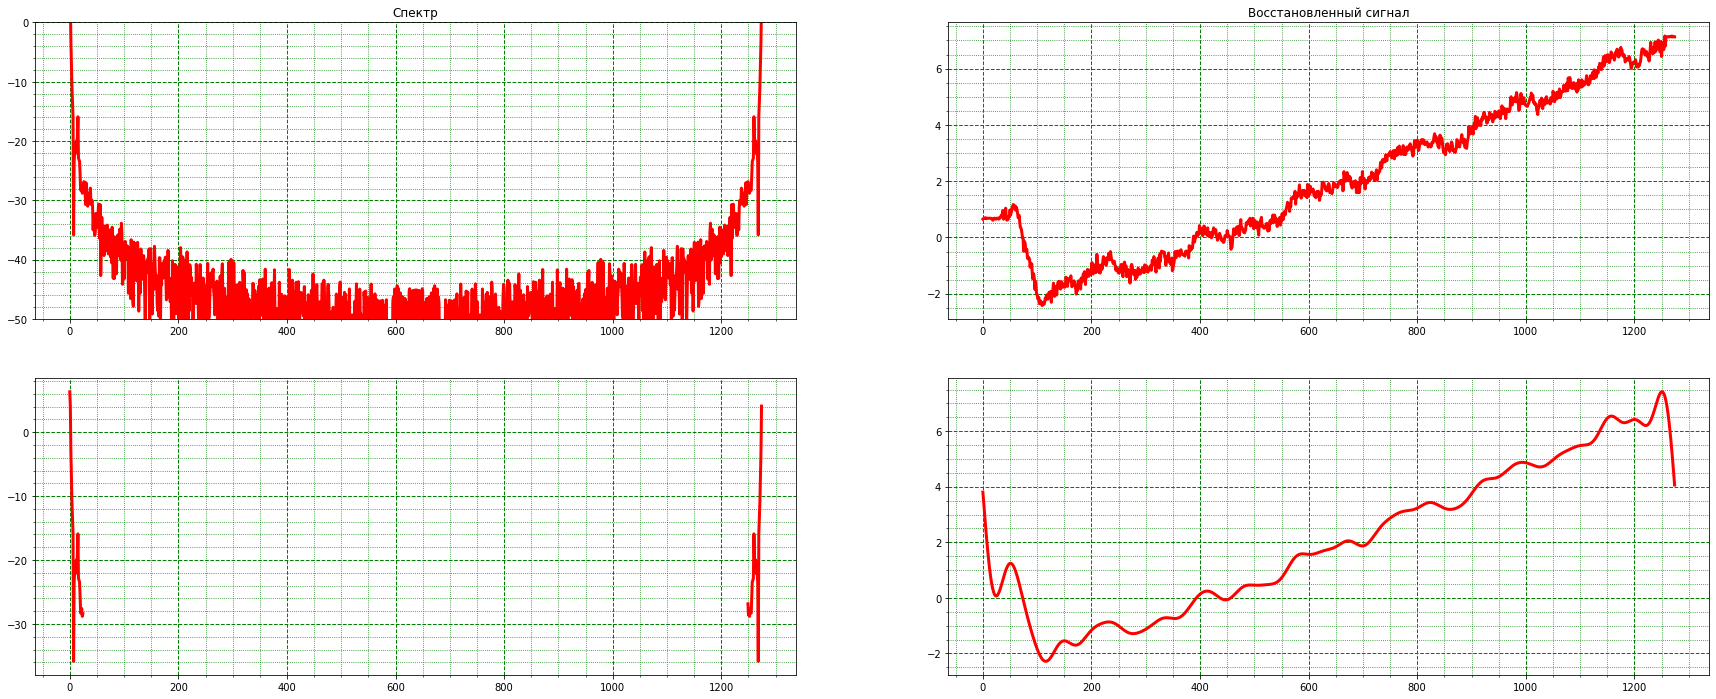

In [92]:
from numpy.fft import rfft, irfft

#Преобразование Фурье
furie_data = np.fft.fft(data)/len(data) #переход из временной области в частотную с помощью БПФ
max_furie_data = max(abs(furie_data))
count = len(furie_data)
furie_data_clear = np.array(furie_data)
f_count = int(count * 0.96)
for i in range(int((count - f_count)/2), int((count+f_count)/2), 1):
    furie_data_clear[i] = 0
    
furie_data_new_clear=np.fft.ifft(furie_data_clear)*len(data) #возврат во временную область
furie_data_new=np.fft.ifft(furie_data)*len(data) #возврат во временную область

fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(30, 12))

ax[0,0].set(title = 'Спектр')
ax[0,1].set(title = 'Восстановленный сигнал')

ax[0,0].plot(20*np.log10((furie_data)), 'r-', linewidth = 3)
ax[0,0].set_ylim(ymin=-50, ymax=0)
ax[0,1].plot((furie_data_new), 'r-', linewidth = 3)
ax[1,0].plot(20*np.log10((furie_data_clear)), 'r-', linewidth = 3)
ax[1,1].plot((furie_data_new_clear), 'r-', linewidth = 3)

for axe in ax.flat:
    axe.grid(axis = 'both')
    axe.minorticks_on()
    axe.grid(which='major', color = 'g', linewidth = 1, linestyle = '--')
    axe.grid(which='minor', color = 'g', linestyle = ':')


plt.show()

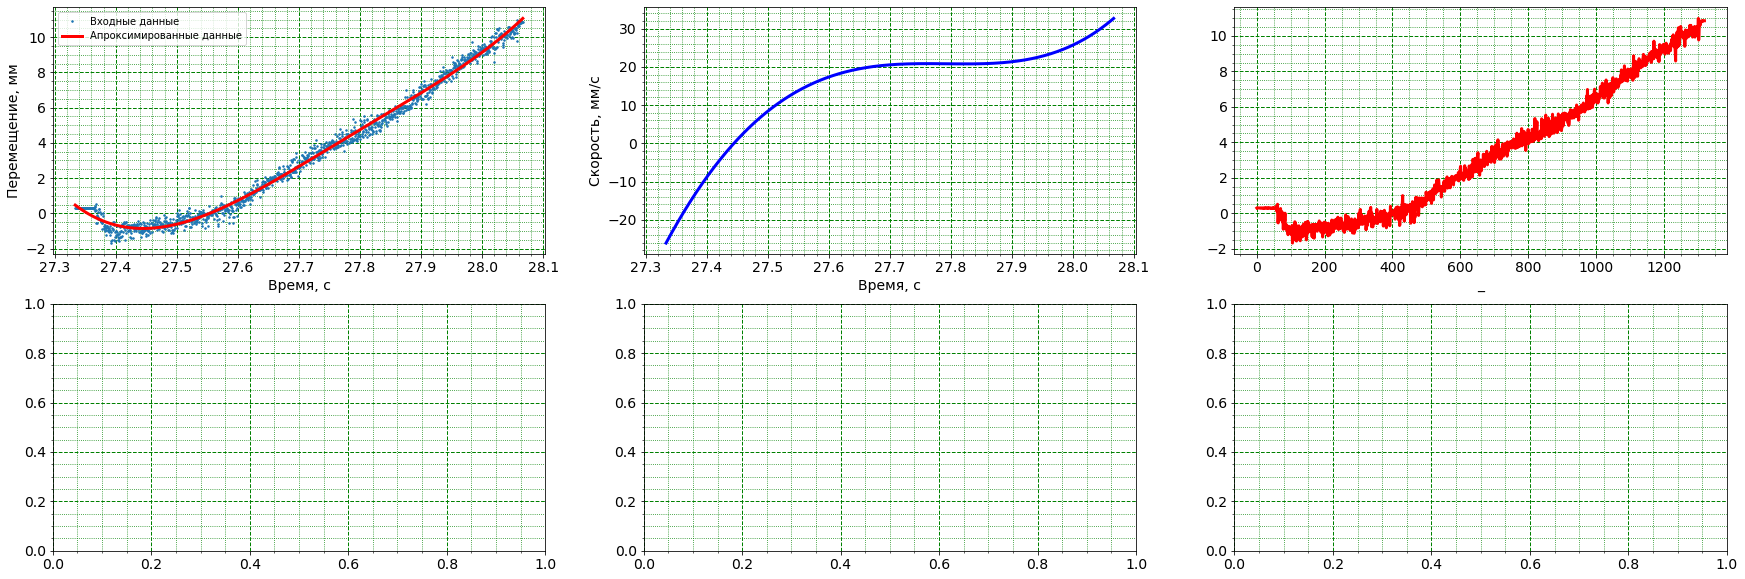

In [72]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))

# #  Прежде чем рисовать вспомогательные линии
# #  необходимо включить второстепенные деления осей:
# ax[0,0].minorticks_on()
# #  Определяем внешний вид линий основной сетки:
# ax[0].grid(which='major', color = 'g', linewidth = 1, linestyle = '--')
# #  Определяем внешний вид линий вспомогательной сетки:
# ax[0].grid(which='minor', color = 'g', linestyle = ':')

ax[0,0].plot(time, data, '.', label='Входные данные', markersize=3)
ax[0,0].plot(time, aprox_data, 'r-', label='Апроксимированные данные', linewidth = 3)
ax[0,0].set_ylabel('Перемещение, мм', fontsize = 14)
ax[0,0].set_xlabel('Время, с', fontsize = 14)

ax[0,1].plot(time, polynom_value(s_diff, time), 'b-', linewidth = 3)
ax[0,1].set_ylabel('Скорость, мм/с', fontsize = 14)
ax[0,1].set_xlabel('Время, с', fontsize = 14)


ax[0,2].plot((furie_data_new), 'r-', linewidth = 3)
#ax[2].plot(g/1021, 'r-', linewidth = 3)
#ax[2].set_ylabel('_', fontsize = 14)
ax[0,2].set_xlabel('_', fontsize = 14)

for axe in ax.flat:
    #axe.grid(axis = 'both')
    axe.minorticks_on()
    axe.grid(which='major', color = 'g', linewidth = 1, linestyle = '--')
    axe.grid(which='minor', color = 'g', linestyle = ':')
    axe.tick_params(labelsize = 14)
    #axe.legend(loc = 'upper left')

ax[0,0].legend(loc = 'upper left') #'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 
            #'center right', 'lower center', 'upper center', 'center'
#ax[0].grid()
#ax[1].grid()
#ax[2].grid()
#plt.savefig('polynom.pdf', format='pdf')
plt.savefig('result.jpg')
#plt.show()